<a href="https://colab.research.google.com/github/nikku1234/Tensorflow_examples/blob/master/linearv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [10]:
!pip install tensorflow==2.0

In [0]:
import tensorflow as tf
import numpy as np
rng = np.random


In [0]:
lr = 0.001
training_steps = 1000
display_step = 50

In [0]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]

In [0]:
#Intialization of weights and bias randomly
W = tf.Variable(rng.randn(),name="weight")
b = tf.Variable(rng.randn(),name="bias")


In [0]:
#Linear Regression 
def linear_regression(x):
  return W * x + b

#Mean Square error
def mean_square(y_pred,y_true):
  return tf.reduce_sum(tf.pow(y_pred-y_true,2)) / (2* n_samples)

#Stochastic Gradients
optimizer = tf.optimizers.SGD(lr)


In [0]:
#Optimization 
def run_optimization():
  # Wrapping computation inside a GradientTape for automatice differentiation
  with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred,Y)

    #Computing gradients 
  gradients = g.gradient(loss,[W,b])

    #Update W and b following gradients
  optimizer.apply_gradients(zip(gradients,[W,b]))

In [29]:
# running training for the given numbber of steps

for steps in range(1,training_steps+1):
  #running the optimization function 
  run_optimization()

  if steps % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred,Y)
    print("step: %i, loss: %f, W: %f, b :%f" %(steps,loss,W.numpy(),b.numpy())) 

step: 50, loss: 0.121998, W: 0.371994, b :-0.054494
step: 100, loss: 0.121454, W: 0.371266, b :-0.049330
step: 150, loss: 0.120917, W: 0.370542, b :-0.044198
step: 200, loss: 0.120386, W: 0.369823, b :-0.039097
step: 250, loss: 0.119862, W: 0.369108, b :-0.034027
step: 300, loss: 0.119344, W: 0.368397, b :-0.028987
step: 350, loss: 0.118832, W: 0.367690, b :-0.023978
step: 400, loss: 0.118327, W: 0.366988, b :-0.019000
step: 450, loss: 0.117827, W: 0.366290, b :-0.014051
step: 500, loss: 0.117334, W: 0.365596, b :-0.009132
step: 550, loss: 0.116846, W: 0.364907, b :-0.004243
step: 600, loss: 0.116365, W: 0.364221, b :0.000616
step: 650, loss: 0.115889, W: 0.363540, b :0.005446
step: 700, loss: 0.115419, W: 0.362863, b :0.010247
step: 750, loss: 0.114954, W: 0.362190, b :0.015018
step: 800, loss: 0.114496, W: 0.361521, b :0.019761
step: 850, loss: 0.114042, W: 0.360856, b :0.024475
step: 900, loss: 0.113594, W: 0.360195, b :0.029161
step: 950, loss: 0.113152, W: 0.359538, b :0.033818
st

In [0]:
import matplotlib.pyplot as plt



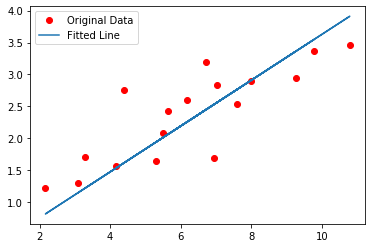

In [31]:
plt.plot(X,Y,'ro',label ='Original Data')
plt.plot(X, np.array(W*X+b),label="Fitted Line")
plt.legend()
plt.show()